In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Gradient Descent Implementation

In [13]:
def gradient_descent(x, y, lr, eps):
    # for visualization purpose
    tracking_data = [[0], [0]]
    
    # initialize a and b
    a, b = 0, 0
    
    while True:
        dLda, dLdb = get_dLda(a, b, x, y), get_dLdb(a, b, x, y)
        
        a = a - lr*dLda
        b = b - lr*dLdb
        
        # for visualization purpose
        tracking_data[0].append(a)
        tracking_data[1].append(b)
    
        if magnitude(dLda, dLdb) < eps:
            break
    
    return a, b, tracking_data

def get_dLda(a, b, x, y):
    sum_ = np.sum(x*y) - a*np.sum(x**2) - b*np.sum(x)
    
    return -2*sum_/len(x)

def get_dLdb(a, b, x, y):
    sum_ = np.sum(y) - a*np.sum(x) - b*len(x)
    
    return -2*sum_/len(x)

def magnitude(dLda, dLdb):
    return np.sqrt(dLda**2+dLdb**2)

## Creating a model for diabetes prediction using the implementation

In [14]:
df_diabetes = pd.read_csv("diabetes.csv")

# select feature and lebal
y = df_diabetes["diabetes_progression"].to_numpy()
x = df_diabetes["bmi"].to_numpy()

# split data
train_x, test_x, train_y, test_y = train_test_split(x, y)

# create model
a, b, tracking_data = gradient_descent(x, y, 0.001, 0.01)
print(a, b)

# predict on test data and evaluate
pred_y = a*test_x + b

# evaluation
print(mean_squared_error(test_y, pred_y, squared=False))

10.227076943463642 -117.687376466989
63.4007419514072


## Visualization of the prediction

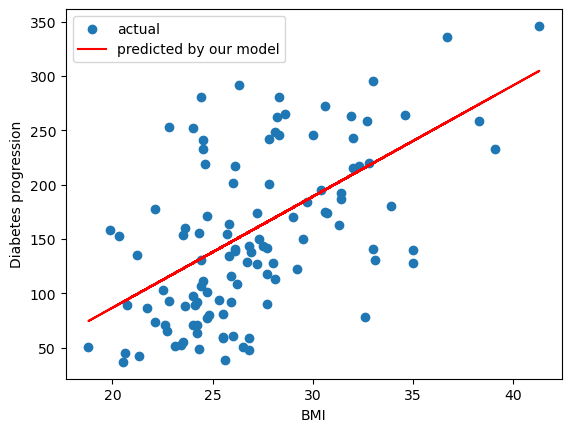

In [6]:
import matplotlib.pyplot as plt

plt.scatter(test_x, test_y, label="actual")
plt.plot(test_x, pred_y, color="red", label="predicted by our model")
plt.xlabel("BMI")
plt.ylabel("Diabetes progression")

plt.legend()

## Visualization of Gradient Descent

In [7]:
def slr_loss(a, b, x, y):
    
    main = (y - np.multiply.outer(a, np.squeeze(x)) - np.reshape(b, b.shape+(1,)))**2
    sum_ = np.sum(main, axis=len(main.shape)-1)
    return sum_/len(x)

Text(0.5, 0, 'L(a, b) - loss function')

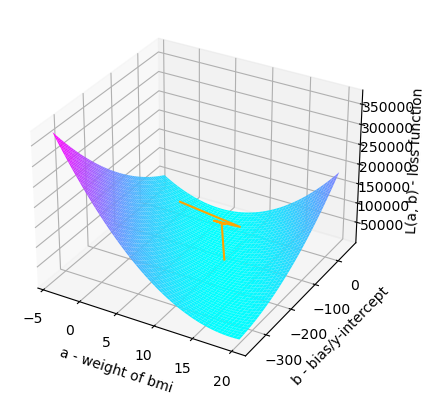

In [28]:
a_range, b_range = np.meshgrid(np.linspace(-4, 20, 500), np.linspace(-350, 50, 200))
z = slr_loss(a_range, b_range, x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
ax.plot3D(tracking_data[0], tracking_data[1], slr_loss(np.array(tracking_data[0]), np.array(tracking_data[1]), x, y), color="orange", zorder=2)
ax.plot_surface(a_range, b_range, z, cmap='cool', zorder=1)
ax.set_xlabel("a - weight of bmi")
ax.set_ylabel("b - bias/y-intercept")
ax.set_zlabel("L(a, b) - loss function")

# ax.view_init(elev=10., azim=80)

In [12]:
tracking_data

[[8.420995464852608,
  4.7801661481832145,
  6.354770873867965,
  5.674264696928011,
  5.968849951187819,
  5.841813653286335,
  5.897083036346544,
  5.8735249203589905,
  5.8840511496034935,
  5.879839569125136,
  5.882000478111823,
  5.881405956418617,
  5.882002841817038,
  5.882084554041905,
  5.882389004397357,
  5.88259712609151,
  5.882846880988044,
  5.8830786155101755,
  5.8833181233760214,
  5.883554251594529,
  5.883791822628524,
  5.884028751285659,
  5.884265939187006,
  5.884502996480021,
  5.88474009173475,
  5.884977152063903,
  5.885214208984353,
  5.8854512488694715,
  5.885688277612308,
  5.885925292665769,
  5.886162295132203,
  5.886399284535973,
  5.886636261083749,
  5.886873224687177,
  5.8871101753854695,
  5.88734711316268,
  5.887584038026712,
  5.887820949975158,
  5.888057849010065,
  5.888294735131556,
  5.888531608340587,
  5.888768468637755,
  5.889005316023808,
  5.88924215049943,
  5.8894789720653336,
  5.889715780722219,
  5.889952576470792,
  5.89018

Text(0, 0.5, 'loss')

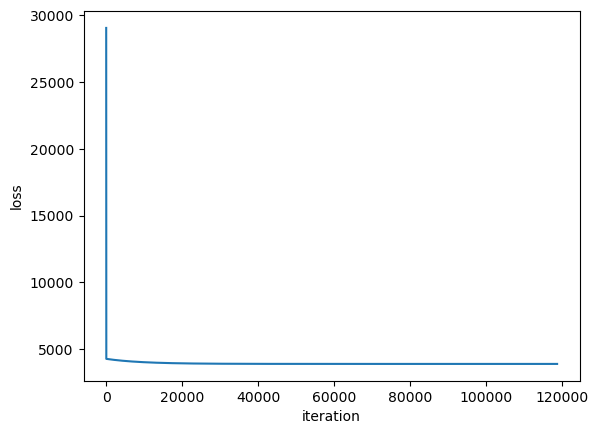

In [30]:
plt.plot(slr_loss(np.array(tracking_data[0]), np.array(tracking_data[1]), x, y))
plt.xlabel("iteration")
plt.ylabel("loss")